In [18]:
# Render our plots inline
%matplotlib inline

from requests import get
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from pandas.io.json import json_normalize

from mycbr_py_api import MyCBRRestApi as mycbr

In [19]:
server = 'localhost'
#server = 'hv-6066.idi.ntnu.no'

port = '8080'
base_url = 'http://' + server + ':' + port + '/'

obj = mycbr(base_url)

In [20]:
def get_casebases():
    raw = pd.DataFrame(requests.get(base_url + 'casebase/').json()) 
    casebases = pd.DataFrame.from_records(raw).values.tolist()
    return casebases


def get_instances(concept, casebase):
    raw = pd.DataFrame(requests.get(base_url + 'concepts/' + concept + '/casebases/' + casebase + '/cases').json()) 
    instances = raw.apply(pd.to_numeric, errors='coerce').fillna(raw)
    return instances

In [21]:
casebase = get_instances('patient','cb_all')
casebase

,similarity,caseID,activity_1,age_1,bmi_1,body_main_1,comorbidity_count_1,education_1,employ_1,eq5d_care_1,...,pain_last_week_1,painsite_number_1,patient_id,pseq_score_1,qol15d_q14_vital_1,qol15d_q5_sleep_1,smoking_1,walk_aid_1,work_ability_1,work_type_1
0,1,patient66,slightly reduced,37,32.872,multisite,2 to 3 comorbidities,more than 4 years higher education,working or other,no problem,...,4,4,support11_1837_1984,11,moderately weary,great problems,no,no,6,much walking
1,1,patient65,quite reduced,55,21.7738,back,0 comorbidity,high school,sick leave,no problem,...,8,1,support24_104_1966,7,slightly weary,slight problem,yes,no,0,much walking
2,1,patient68,slightly reduced,74,21.3599,shoulder,1 comorbidity,up to 4 years higher education,working or other,no problem,...,4,3,support28_2007_1947,9,slightly weary,great problems,no,no,5,_unknown_
3,1,patient67,slightly reduced,25,21.0077,multisite,2 to 3 comorbidities,other,working or other,no problem,...,1,5,support11_1903_1996,11,extremely weary,slight problem,no,no,8,_unknown_
4,1,patient62,slightly reduced,20,30.4687,knee,0 comorbidity,high school,working or other,no problem,...,1,2,support34_5_2001,10,slightly weary,sleep normally,no,no,6,_unknown_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,patient105,slightly reduced,49,28.2284,knee,2 to 3 comorbidities,high school,working or other,no problem,...,9,3,support10_100_1972,12,slightly weary,sleep normally,no,no,9,mostly seated
151,1,patient104,slightly reduced,39,20.7031,shoulder,0 comorbidity,up to 4 years higher education,working or other,slight problem,...,3,4,support9_8092_1982,10,slightly weary,slight problem,no,no,5,mostly seated
152,1,patient109,quite reduced,62,_unknown_,shoulder,2 to 3 comorbidities,high school,working or other,no problem,...,5,4,support10_110_1959,6,slightly weary,moderate problems,no,no,5,_unknown_
153,1,patient108,quite reduced,67,29.5369,back,0 comorbidity,high school,sick leave,no problem,...,7,2,support10_106_1954,2,healthy and energetic,sleep normally,no,no,1,much walking and lifting


In [22]:
def plot_numeric_box(plot_data, attribute, title):
    if(plot_data[attribute].min()>-100):
        ax = sns.boxplot(plot_data[attribute])
        ax = sns.swarmplot(plot_data[attribute], color=".25")
        ax.set(xlabel=attribute, title=title + ' Boxplot (n='+ plot_data[[attribute]].dropna().__len__().__str__()+' (of ' + plot_data[[attribute]].__len__().__str__() +'))')
    
def plot_symbolic(plot_data, attribute, title):
    if(plot_data[attribute].isnull().sum() != plot_data.caseID.count()):
        ax = sns.countplot(x=attribute, data=plot_data)
        ax.set(xlabel=attribute, ylabel='Dist', title=title + ' Distribution (n='+ plot_data[[attribute]].dropna().__len__().__str__()+' (of ' + plot_data[[attribute]].__len__().__str__() +'))')
    

/Users/kerstin/anaconda3/envs/python38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kerstin/anaconda3/envs/python38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


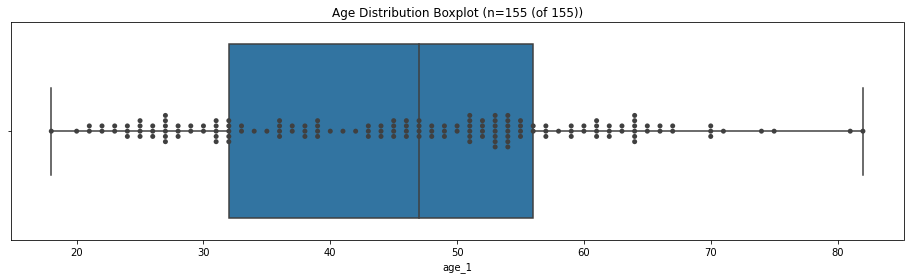

In [23]:
plt.rcParams["figure.figsize"] = (16, 4)
plot_numeric_box(casebase, 'age_1', 'Age Distribution')

/Users/kerstin/anaconda3/envs/python38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kerstin/anaconda3/envs/python38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


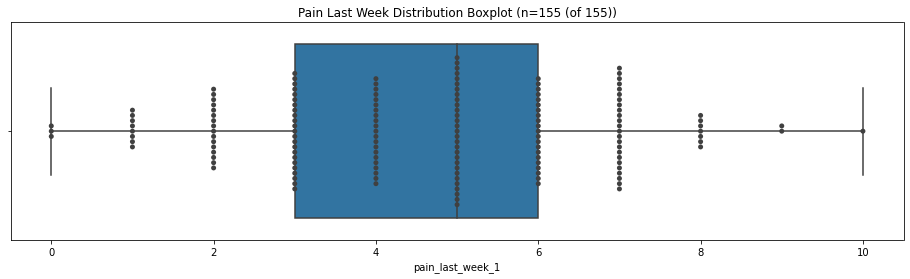

In [26]:
plt.rcParams["figure.figsize"] = (16, 4)
plot_numeric_box(casebase, 'pain_last_week_1', 'Pain Last Week Distribution')

/Users/kerstin/anaconda3/envs/python38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kerstin/anaconda3/envs/python38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kerstin/anaconda3/envs/python38/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


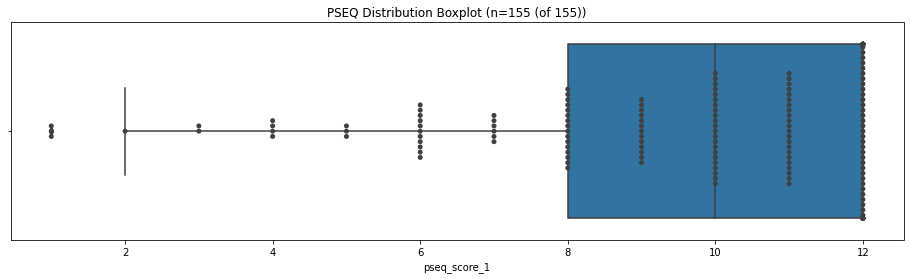

In [28]:
plt.rcParams["figure.figsize"] = (16, 4)
plot_numeric_box(casebase, 'pseq_score_1', 'PSEQ Distribution')

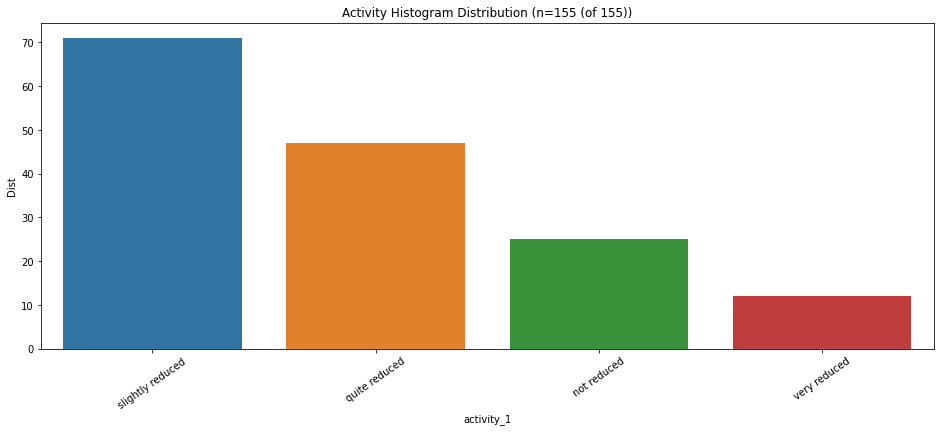

In [24]:
plt.rcParams["figure.figsize"] = (16, 6)
plt.xticks(rotation=35)
plot_symbolic(casebase, 'activity_1', 'Activity Histogram')

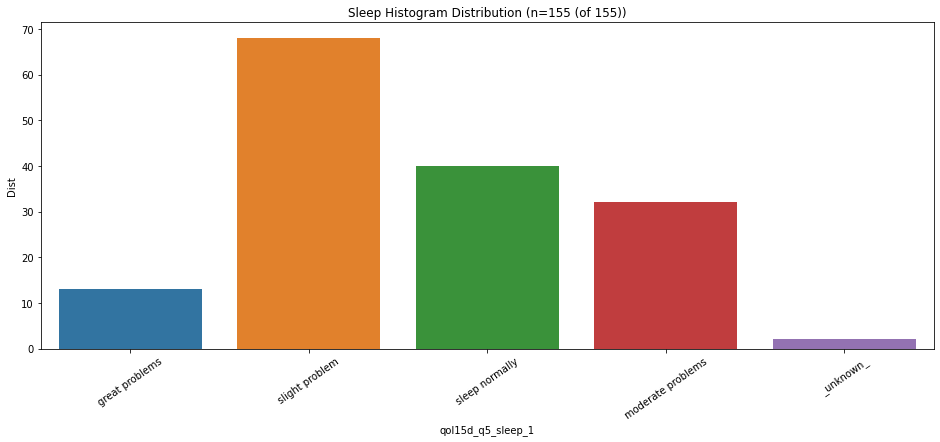

In [29]:
plt.rcParams["figure.figsize"] = (16, 6)
plt.xticks(rotation=35)
plot_symbolic(casebase, 'qol15d_q5_sleep_1', 'Sleep Histogram')

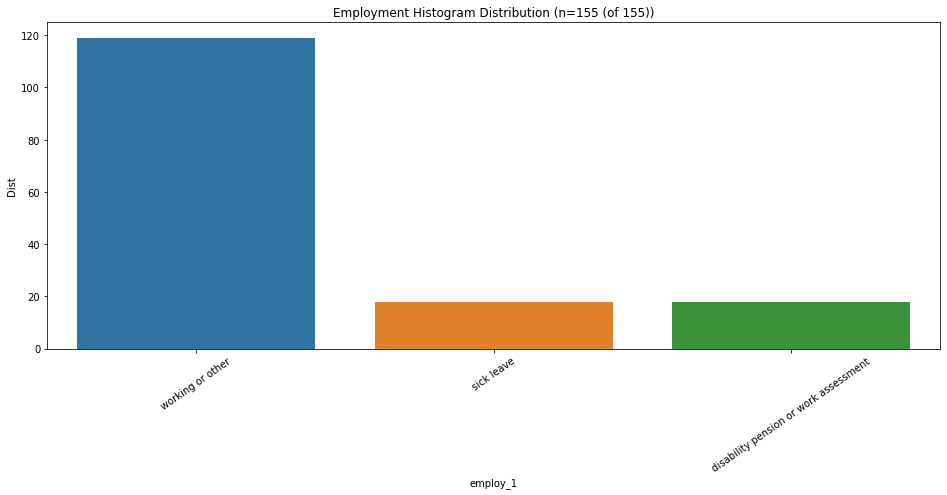

In [30]:
plt.rcParams["figure.figsize"] = (16, 6)
plt.xticks(rotation=35)
plot_symbolic(casebase, 'employ_1', 'Employment Histogram')